In [1]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np
import hashlib
import corner
from datetime import datetime

In [2]:
label, Niter, Nwalkers, Scale = "simple_emcee_1", 20000, 4, {'a':0.000001, 'm':0.00000001}

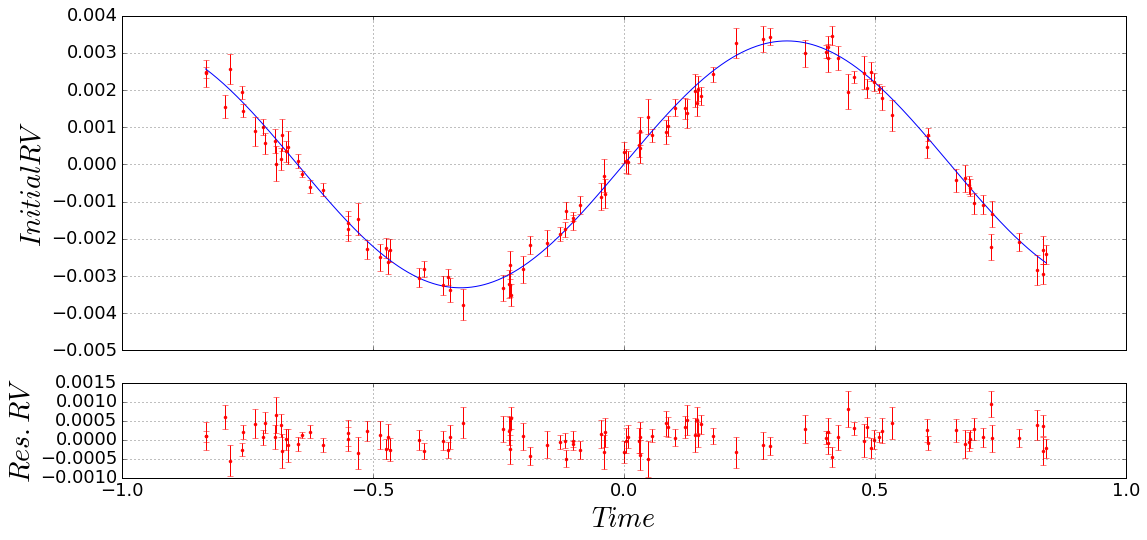

In [3]:
initial_state = state.State(planets= [{'a':0.3500, 'm':0.001965}], ignore_vars='m')
start_state = state.State(planets= [{'a':0.3800, 'm':0.001965}], ignore_vars='m')
obs = driver.createObs(initial_state, 100, 3.0e-4, 9e-5, 1.7)
driver.inLinePlotObs(initial_state, obs, [18,6])

In [4]:
em_bundle, em_h = driver.createEns(label, Niter, start_state, obs, Nwalkers, Scale, printing_every=2000)

Progress: 0.02%, time: 2017-02-28 05:39:52.137645
Progress: 40.02%, time: 2017-02-28 05:40:17.563546
Progress: 80.02%, time: 2017-02-28 05:40:41.578647
Error(s): 0
Acceptance rate: 100.000%
The id of the simulation is: 25bf8f23417de1e26092a04d2d1cd166
The end time of the simulation is 2017-02-28 05:40:53.575041


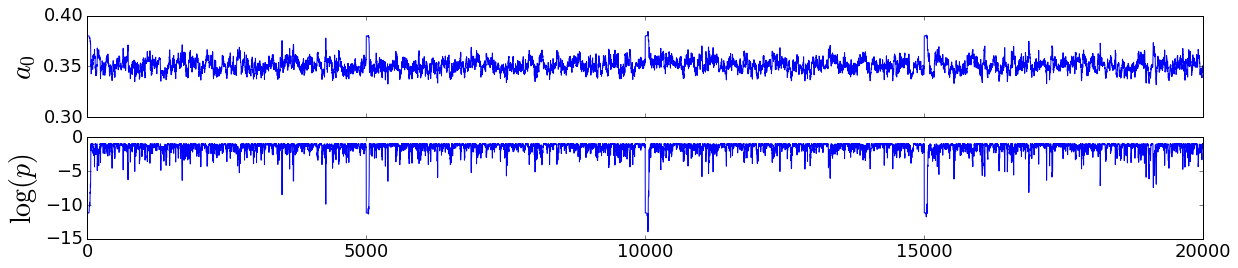

In [5]:
driver.inLinePlotChains(em_bundle, [20,4])

Eliminated burn in, sampled every 2, for every walker.
Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$']
[ 0.35090323]


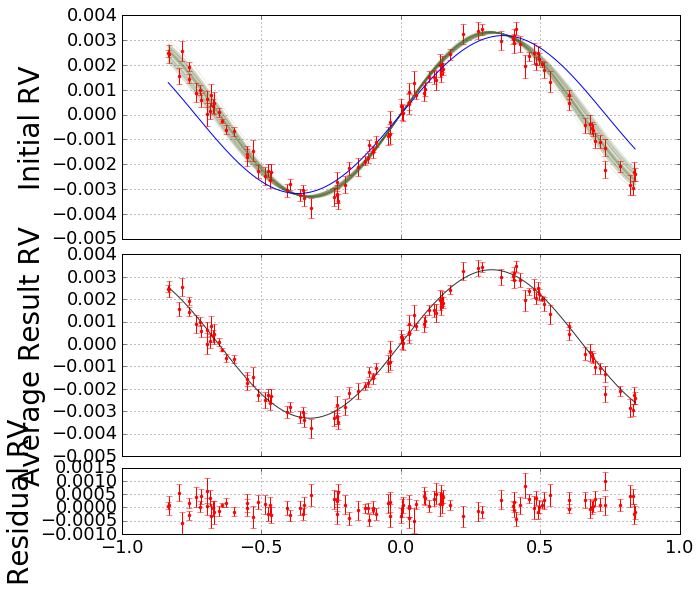

In [6]:
trimmedResEM, trimmedlogpEM = driver.inLinePlotResults(em_bundle, 50, [10,4], 0.5, 2)

AC time 14.5


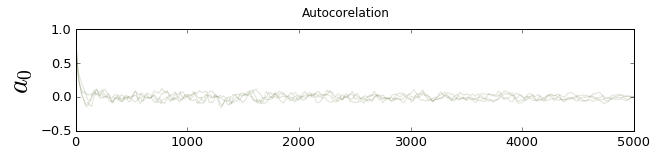

In [7]:
actimesEM = driver.inLinePlotAcTimes(em_bundle, [10, 4])

# Smala

In [8]:
sm_bundle, sm_h = driver.createSMALA(label, Niter/4, start_state, obs, 1.25, 0.14, printing_every=300)

Progress: 0.02%, 5 tries have been made, time: 2017-02-28 05:40:56.256871
Progress: 6.02%, 352 tries have been made, time: 2017-02-28 05:40:59.627890
Progress: 12.02%, 698 tries have been made, time: 2017-02-28 05:41:03.019057
Progress: 18.02%, 1054 tries have been made, time: 2017-02-28 05:41:06.418951
Progress: 24.02%, 1405 tries have been made, time: 2017-02-28 05:41:09.750985
Progress: 30.02%, 1763 tries have been made, time: 2017-02-28 05:41:13.063739
Progress: 36.02%, 2118 tries have been made, time: 2017-02-28 05:41:16.492631
Progress: 42.02%, 2468 tries have been made, time: 2017-02-28 05:41:19.844024
Progress: 48.02%, 2833 tries have been made, time: 2017-02-28 05:41:23.318119
Progress: 54.02%, 3193 tries have been made, time: 2017-02-28 05:41:26.722351
Progress: 60.02%, 3554 tries have been made, time: 2017-02-28 05:41:30.112782
Progress: 66.02%, 3896 tries have been made, time: 2017-02-28 05:41:33.331220
Progress: 72.02%, 4245 tries have been made, time: 2017-02-28 05:41:36.

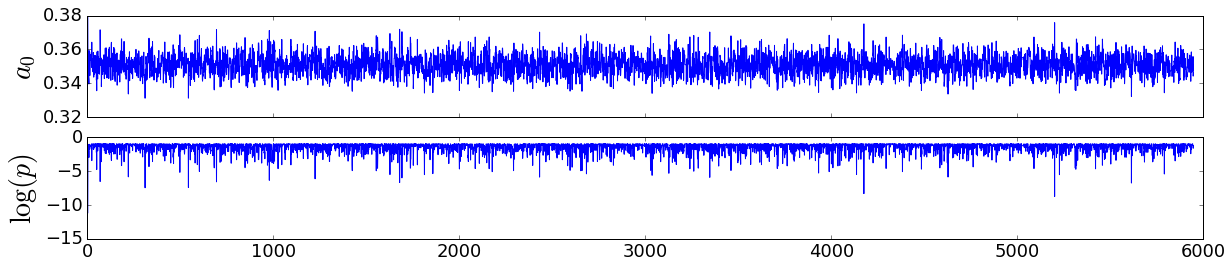

In [9]:
driver.inLinePlotChains(sm_bundle, [20,4])

Eliminated burn in, sampled every 1, for every walker.
Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$']
[ 0.3509329]


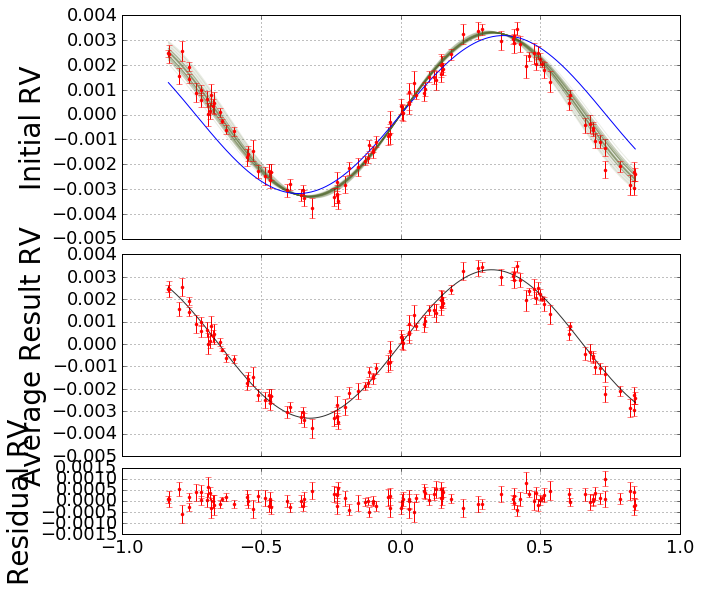

In [10]:
trimmedResSM, trimmedlogpSM = driver.inLinePlotResults(sm_bundle, 50, [10,4], 0.3, 1)

AC time 1.0


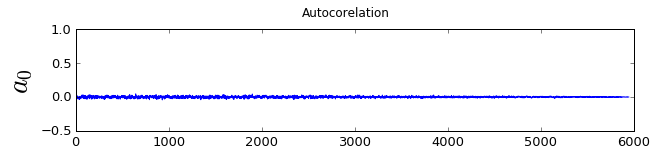

In [11]:
actimesSM = driver.inLinePlotAcTimes(sm_bundle, [10,4])

# Comparison

In [12]:
from scipy import stats

def showCDF(chain1, chain2, size):
    for i in range(len(np.transpose(chain1))):
        fig = plt.figure(figsize=(size[0],size[1]))
        plt.plot(sorted(np.transpose(chain1)[i]), np.linspace(0,1, len(np.transpose(chain1)[i])))
        plt.plot(sorted(np.transpose(chain2)[i]), np.linspace(0,1, len(np.transpose(chain2)[i])))
        plt.ylabel('Fractionsl CDF')
        
def calcKStatistic(chain1, chain2):
    for i in range(len(np.transpose(chain1))):
        print stats.ks_2samp(np.transpose(chain1)[i], np.transpose(chain2)[i])

In [13]:
calcKStatistic(sm_bundle.mcmc_chain, em_bundle.mcmc_chain)

Ks_2sampResult(statistic=0.02367710154673841, pvalue=0.011497968184021958)


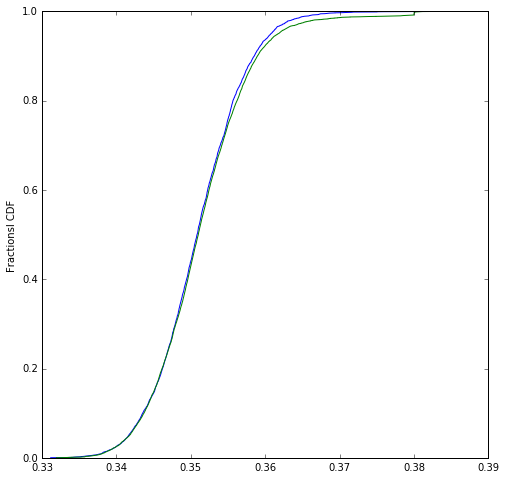

In [14]:
showCDF(sm_bundle.mcmc_chain, em_bundle.mcmc_chain, [8,8])

In [15]:
calcKStatistic(trimmedResSM, trimmedResEM)

Ks_2sampResult(statistic=0.017857142857142849, pvalue=0.52404030358175058)


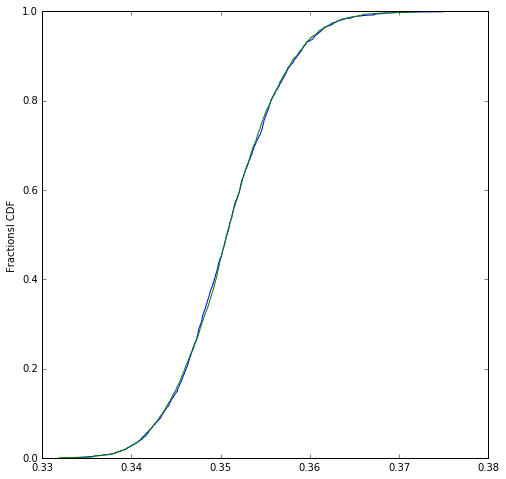

In [16]:
showCDF(trimmedResSM, trimmedResEM, [8,8])